# Assignment - Data Handling 3:

## Assignment Background:

This short assignment contains three sections of questions that build upon and incorporate methods, techniques and concepts taught and demonstrated in the lesson materials.

All questions aim to consider biological context. Timely submission will result in your assignment being returned within 14 days of the submission deadline. Marked Jupyter Notebook manuscripts will be returned with comments from your marker If you receive a pass or distinction, your marker will attach the model solutions for this assignment *via* the open pull request on your lesson's GitHub repository.

This assignment aims to have you replicate the exploration and manipulation of images using the Matplotlib demonstrated in the online resource. All methods for completing this assignment, should be found in the resource.

*Note: You will only be assessed on your code, questions asking about the results are solely for you to contemplate.*

## Assignment Questions:

### Question 1

**A.**

Using the image "rat_cerebellum.jpg" from the [data](../data/) folder, complete the following questions.
- Read the image into your workspace and display it.

In [15]:
from matplotlib.pyplot import imread, subplots, show

In [16]:
## Import the image

img_task = imread('./data/rat_cerebellum.jpeg')

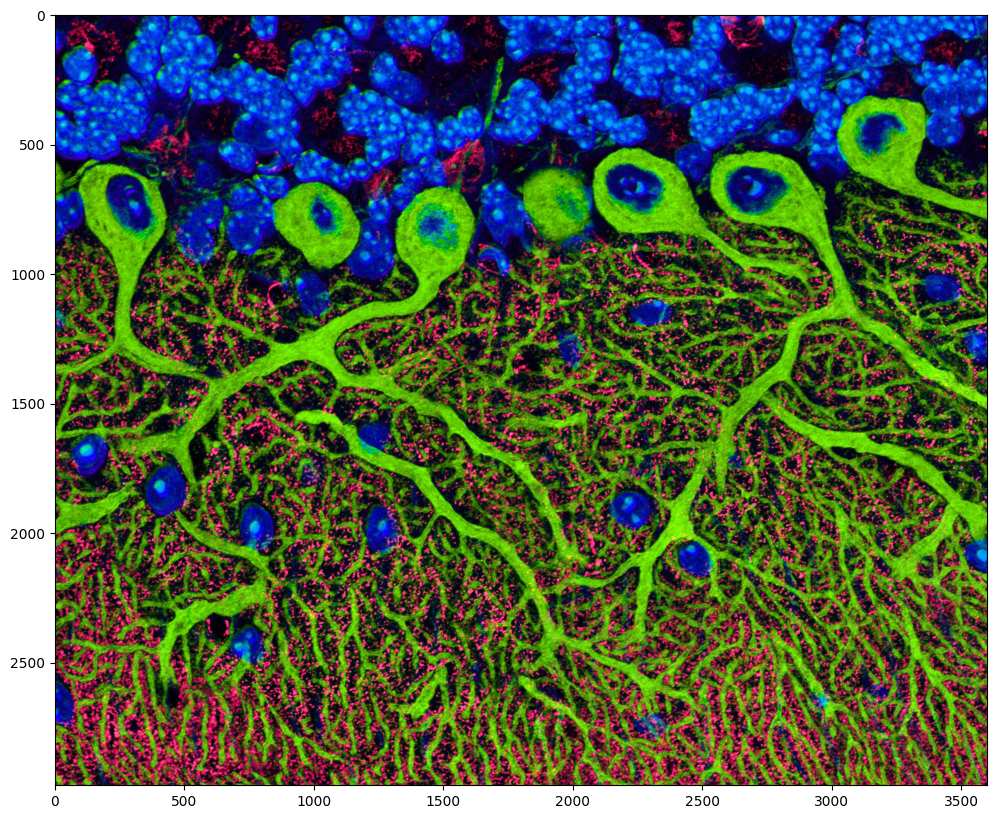

In [17]:
fig, ax = subplots(figsize=(20, 10))

ax.imshow(img_task, cmap='gray');

show()

**B.** 

Extract and isolate each of the colour channels (RGB):
- Save each colour channel as it's own variable
- As a subplot, plot the image with only a single colour per subplot
- Seperately, plot the respective histograms of each colour

In [18]:
red_channel   = img_task[:, :, 0]
green_channel = img_task[:, :, 1]
blue_channel  = img_task[:, :, 2]

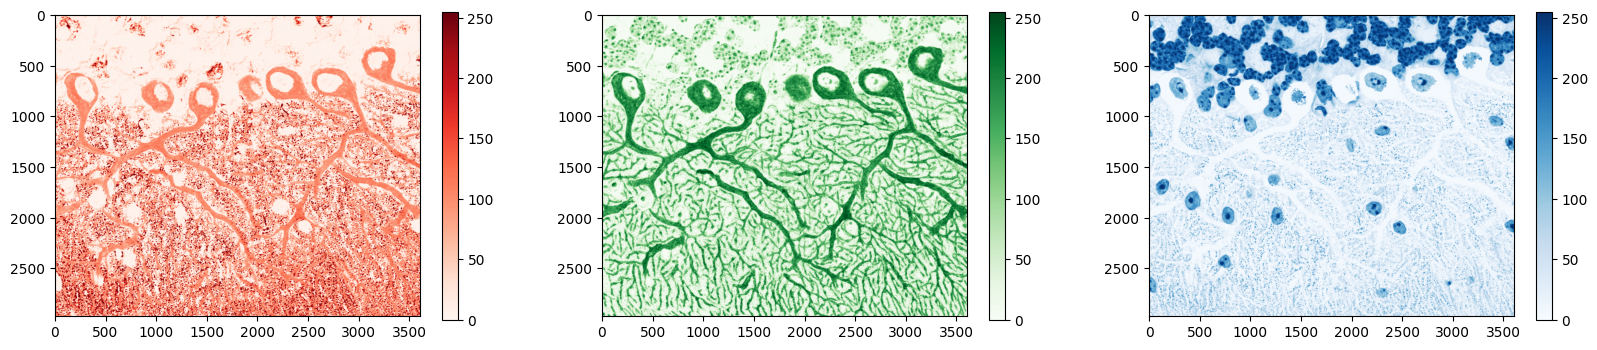

In [19]:
fig, ax = subplots(nrows=1, ncols=3, figsize=(20, 10))

imgplot_red = ax[0].imshow(red_channel, cmap="Reds")
imgplot_green = ax[1].imshow(green_channel, cmap="Greens")
imgplot_blue = ax[2].imshow(blue_channel, cmap="Blues")

fig.colorbar(imgplot_red, ax=ax[0], shrink=0.4)
fig.colorbar(imgplot_green, ax=ax[1], shrink=0.4)
fig.colorbar(imgplot_blue, ax=ax[2], shrink=0.4);

show()

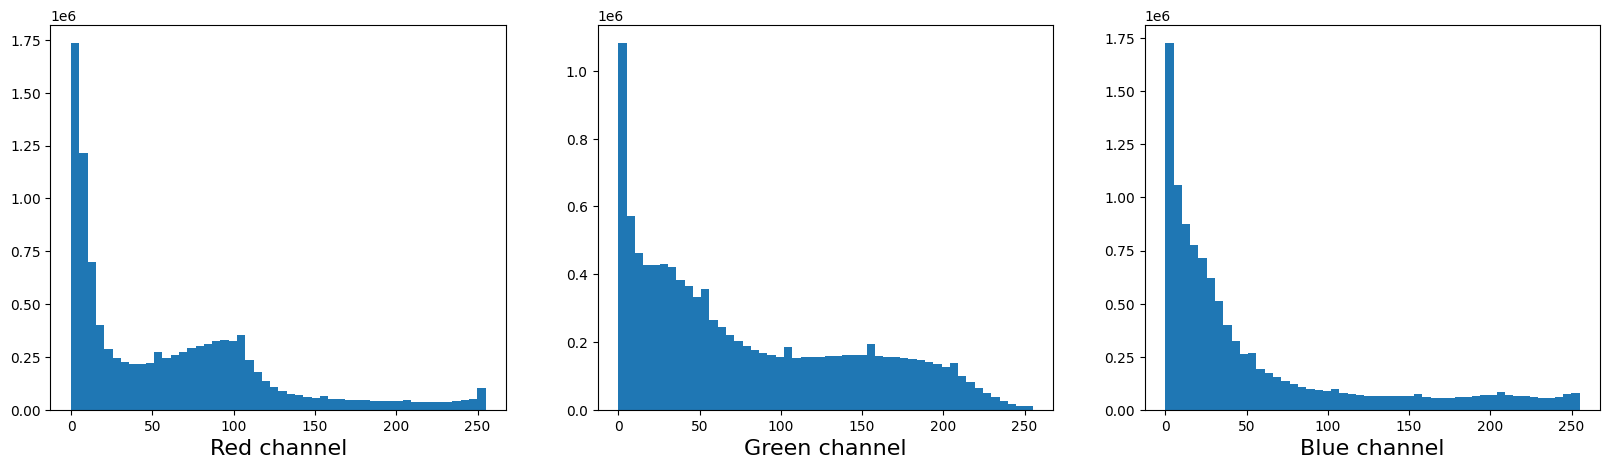

In [20]:
fig, ax = subplots(ncols=3, figsize=(20, 5))

ax[0].hist(red_channel.flatten(), bins=50)
ax[0].set_xlabel("Pixel intensity", fontsize=16)
ax[0].set_xlabel("Red channel")
ax[1].hist(green_channel.flatten(), bins=50)
ax[1].set_xlabel("Pixel intensity", fontsize=16)
ax[1].set_xlabel("Green channel")
ax[2].hist(blue_channel.flatten(), bins=50)
ax[2].set_xlabel("Pixel intensity", fontsize=16)
ax[2].set_xlabel("Blue channel");

show()

### Question 2

**A.**

Create three different binary masks using manually determined thresholds, one for each colour channel: 
- Pick an appropriate threshold based on the two sets of figures above
- Create a masked image by setting the values that correspond to False to zero

*Note that you can apply conditions that are either greater than or smaller than a threshold of your choice.*

In [21]:
red_mask   = red_channel   > 120
green_mask = green_channel > 150
blue_mask  = blue_channel  > 100

red_masked   = red_channel * red_mask
green_masked = green_channel * green_mask
blue_masked  = blue_channel * blue_mask

**B.**

Plot the three masks and the corresponding masked images. (6 subplots)

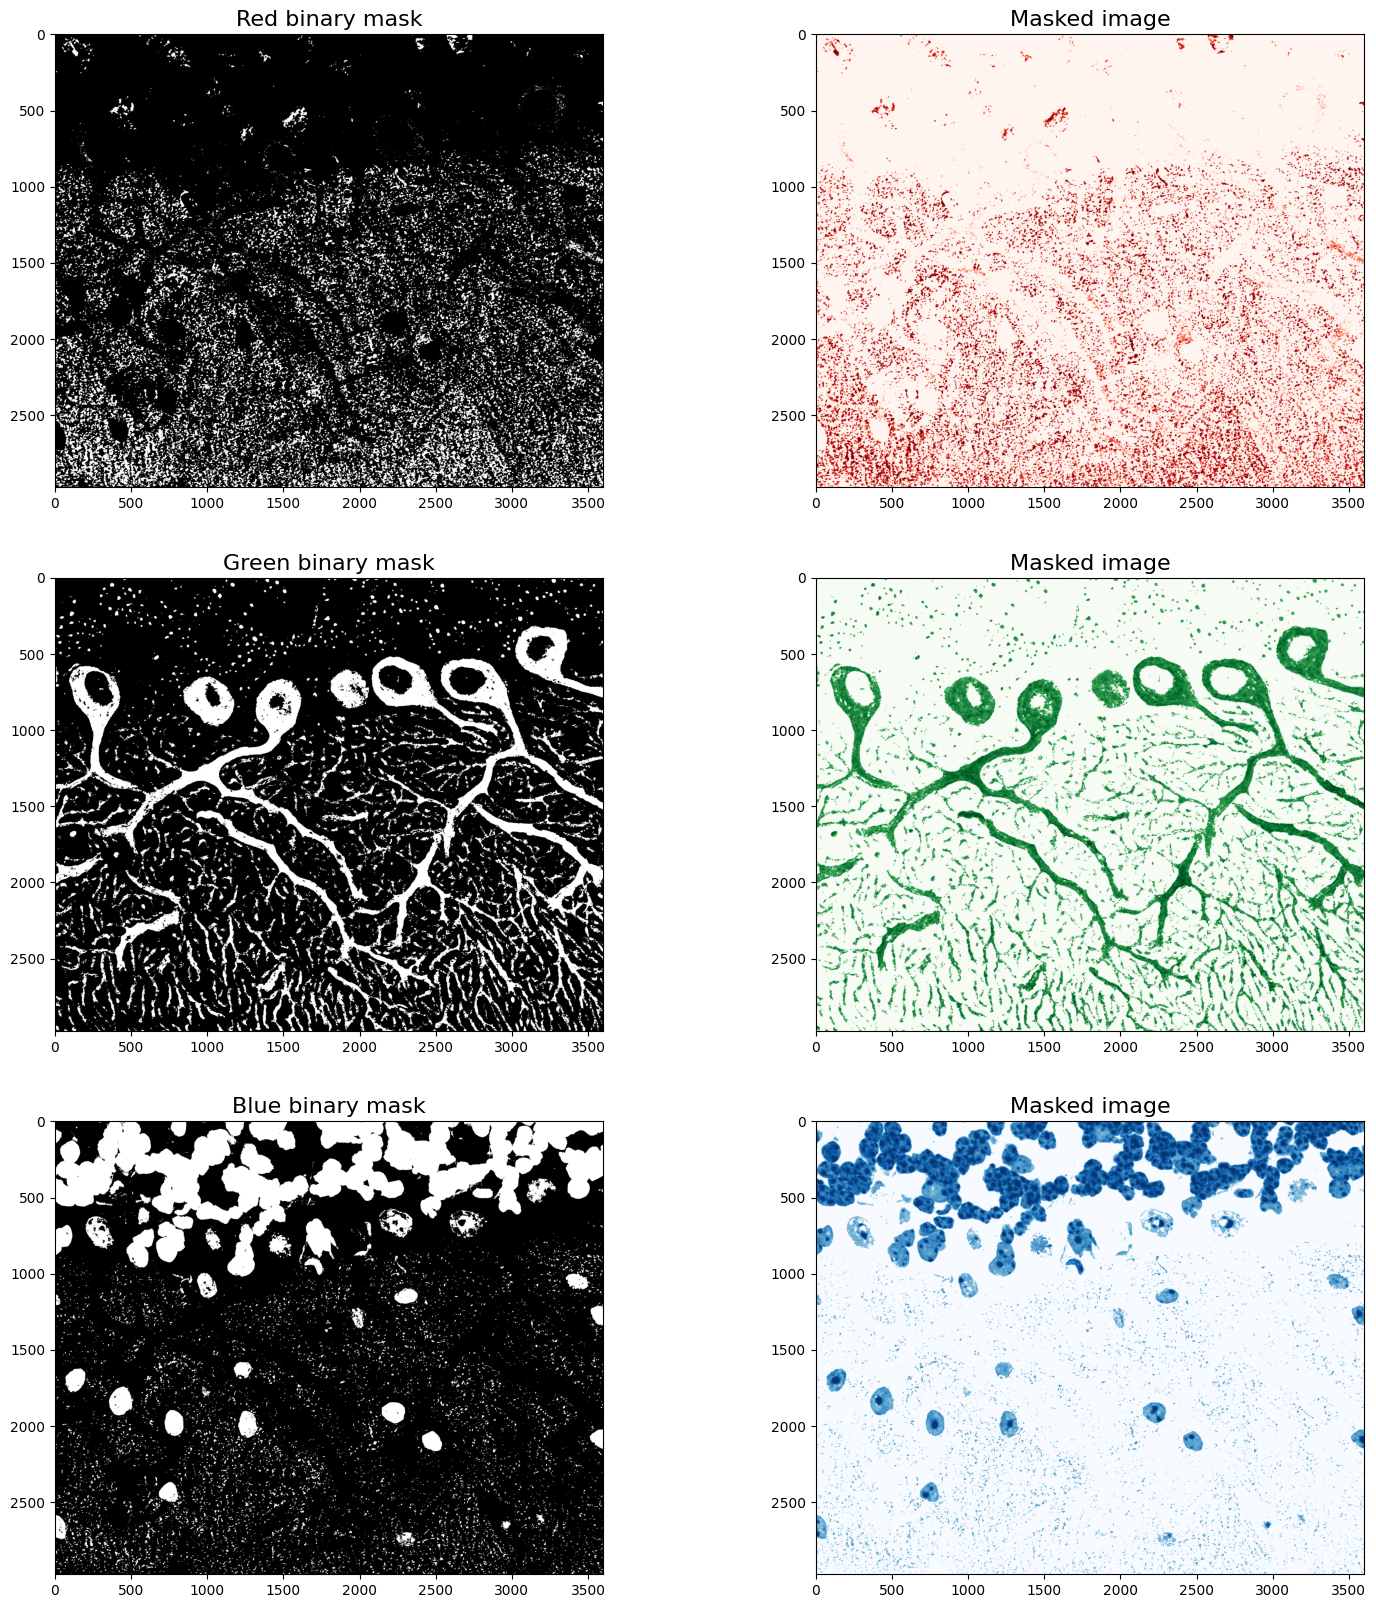

In [22]:
fig, ax = subplots(nrows=3, ncols=2, figsize=(18, 20))

ax[0, 0].imshow(red_mask, cmap='gray')
ax[0, 0].set_title('Red binary mask', fontsize=16)
ax[0, 1].imshow(red_masked, cmap='Reds')
ax[0, 1].set_title('Masked image', fontsize=16)

ax[1, 0].imshow(green_mask, cmap='gray')
ax[1, 0].set_title('Green binary mask', fontsize=16)
ax[1, 1].imshow(green_masked, cmap='Greens')
ax[1, 1].set_title('Masked image', fontsize=16)

ax[2, 0].imshow(blue_mask, cmap='gray')
ax[2, 0].set_title('Blue binary mask', fontsize=16)
ax[2, 1].imshow(blue_masked, cmap='Blues')
ax[2, 1].set_title('Masked image', fontsize=16);

show()

### Question 3

**A.**

Using your masks, approximate the relative amounts of synaptophysin, IP3R, and DNA in the image.

Your can assume:
- red pixels = synaptophysin
- green pixels = IP3R
- blue pixels = DNA. 

Give your results as a percentage of the total pixels.
- Calculate total pixels from the height and width of the image.
- The results will vary depending on the setting of the thresholds.
- Have a play around with different threshold values, see how they change your results.

In [23]:
from numpy import sum 

In [24]:
total_pixels = img_task.shape[0] * img_task.shape[1]

red_counts   = sum(red_mask)
green_counts = sum(green_mask)
blue_counts  = sum(blue_mask)

print("Approximately %d"%(red_counts/total_pixels*100)+"% of the image is synaptophysin")
print("Approximately %d"%(green_counts/total_pixels*100)+"% of the image is IP3R")
print("Approximately %d"%(blue_counts/total_pixels*100)+"% of the image is DNA")

Approximately 13% of the image is synaptophysin
Approximately 19% of the image is IP3R
Approximately 18% of the image is DNA


**B.**

Change the resolution of your image to different values. How does the resolution affect your results?
- Use Image from PIL to change the resolution of your image.
- Repeat the same workflow from the previous question.


In [27]:
from PIL import Image
from numpy import array

In [28]:
img = Image.open('./data/rat_cerebellum.jpeg')
img_small = img.resize((297, 360))
img_numpy = array(img_small)

In [29]:
red_channel_small   = img_numpy[:, :, 0]
green_channel_small = img_numpy[:, :, 1]
blue_channel_small  = img_numpy[:, :, 2]

total_pixels_small = img_numpy.shape[0] * img_numpy.shape[1]

red_mask_small   = red_channel_small   > 120
green_mask_small = green_channel_small > 150
blue_mask_small  = blue_channel_small  > 100

red_counts_small   = sum(red_mask_small)
green_counts_small = sum(green_mask_small)
blue_counts_small  = sum(blue_mask_small)

print("Percentage of each stain after resizing")
print("-" * 50)
print("Approximately %d"%(red_counts_small/total_pixels_small*100)+"% of the image is synaptophysin")
print("Approximately %d"%(green_counts_small/total_pixels_small*100)+"% of the image is IP3R")
print("Approximately %d"%(blue_counts_small/total_pixels_small*100)+"% of the image is DNA")

Percentage of each stain after resizing
--------------------------------------------------
Approximately 11% of the image is synaptophysin
Approximately 17% of the image is IP3R
Approximately 16% of the image is DNA
